In [50]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [51]:
w1_initial=np.random.normal(size=(28*28*1,10)).astype(np.float32)

In [52]:
with tf.device('/gpu:0'):
    def next_batch(batch_size, image, label):
        a=np.random.randint(np.shape(image)[0] -batch_size)
        batch_x = image[a:a+batch_size,:]
        batch_y = label[a:a+batch_size,:]
        return batch_x, batch_y

In [53]:
train_img=np.load('/home/user01/notebook/Mnist_Data/train_img.npy')
train_lab=np.load('/home/user01/notebook/Mnist_Data/train_lab.npy')
test_img=np.load('/home/user01/notebook/Mnist_Data/test_img.npy')
test_lab=np.load('/home/user01/notebook/Mnist_Data/test_lab.npy')
val_img=np.load('/home/user01/notebook/Mnist_Data/val_img.npy')
val_lab=np.load('/home/user01/notebook/Mnist_Data/val_lab.npy')

In [54]:
print np.shape(train_img)

(55000, 784)


[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


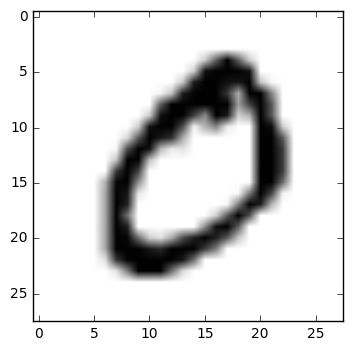

In [55]:
img=np.reshape(val_img[1],newshape=[28,28])
lab=val_lab[0]
print lab

plt.imshow(img, cmap='binary')

In [56]:
#x_pre=tf.placeholder(tf.float32, shape=[None,28*28*1])
x_=tf.placeholder(tf.float32, shape=[None,28*28*1])
y_=tf.placeholder(tf.float32, shape=[None, 10])

In [57]:
w1 = tf.Variable(w1_initial)
b1=tf.Variable(tf.zeros([10]))
z1=tf.matmul(x_,w1)
l1=tf.nn.relu(z1)
y=tf.nn.softmax(l1)